In [1]:
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


## Imports

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

## Gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/NewsStocksData
!ls

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1aXOjAYzBS5Ny20kYb43fbgy4HTmK06JQ/NewsStocksData
catboost_info  new.xlsx  yahoo_data.xlsx


## Read data & EDA

In [4]:
df = pd.read_excel('new.xlsx')

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041


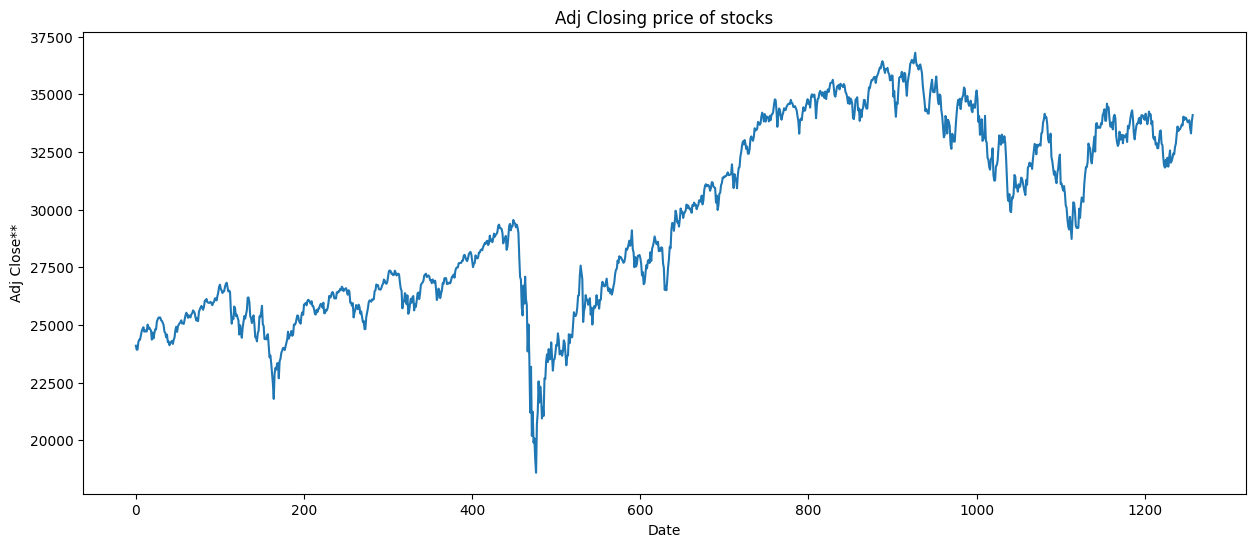

In [6]:
 df["Adj Close**"].plot(figsize=(15, 6))
 plt.xlabel("Date")
 plt.ylabel("Adj Close**")
 plt.title("Adj Closing price of stocks")
 plt.show()

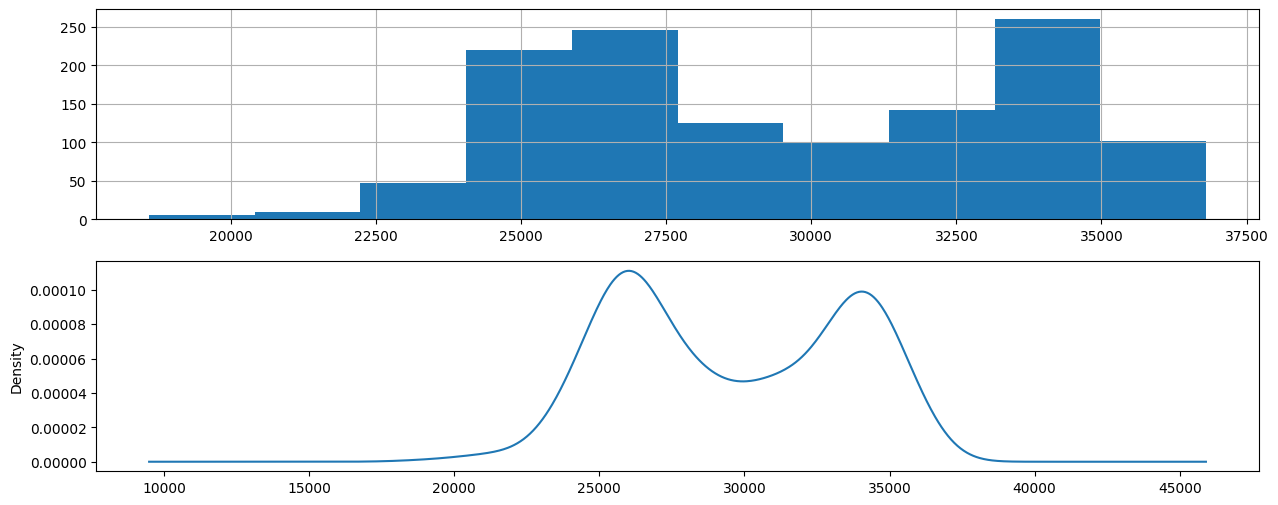

In [7]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Adj Close**"].hist()
plt.subplot(212)
df["Adj Close**"].plot(kind='kde')
plt.show()


## ADfuller test

In [8]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [9]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [10]:
Augmented_Dickey_Fuller_Test_func(df['Adj Close**' ],'Adj Close**')

Results of Dickey-Fuller Test for column: Adj Close**
Test Statistic                   -1.615959
p-value                           0.474849
No Lags Used                      9.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


## Fix test size

In [11]:
TEST_SIZE = int(len(df)*0.25)

#SARIMA

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [13]:
X = df[['Adj Close**']]
X = X.set_index(df['Date'])
X = X.dropna()
train, test = X[0:-TEST_SIZE], X[-TEST_SIZE:]

model = auto_arima(train, start_p=0, start_q=0, max_p=7, max_q=7, seasonal=True,
d=0, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
model.summary()
model = model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18340.210, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17131.144, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22066.729, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13732.076, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13753.673, Time=1.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13699.664, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13699.939, Time=1.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=13699.427, Time=1.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=13683.598, Time=1.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=13652.581, Time=2.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13700.948, Time=2.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   :

In [14]:
forecast = model.predict(TEST_SIZE)
forecast = pd.DataFrame(forecast)
forecast = forecast.set_index(test.index)

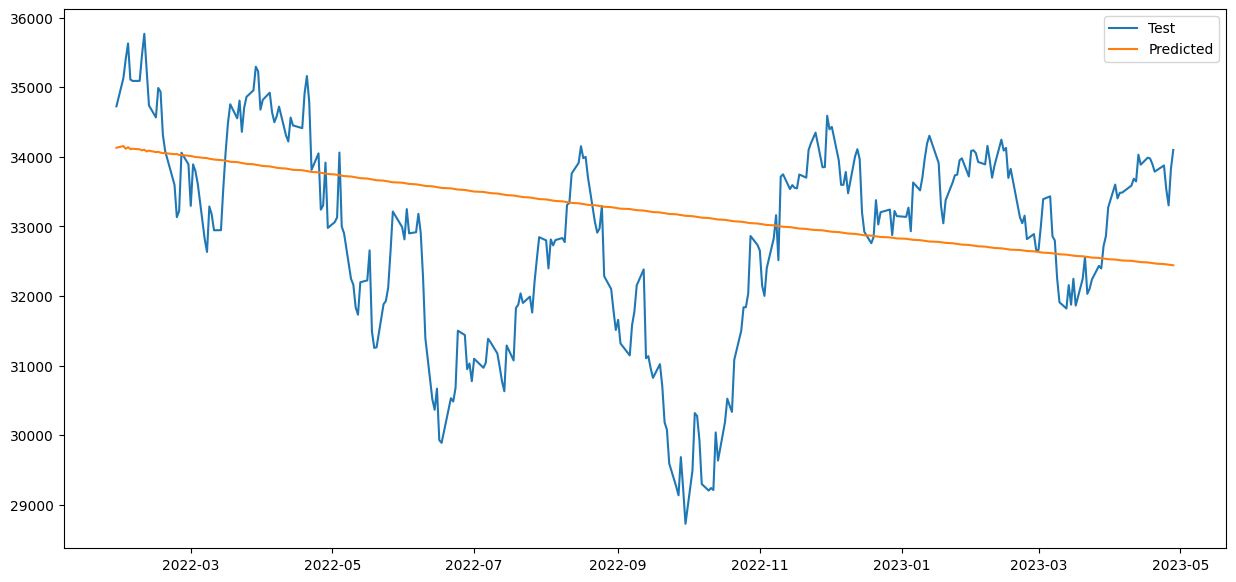

In [15]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
leg = plt.legend(loc='best')
plt.show()

In [16]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 2323703.248009883
MSE is : 1206.462237385776
RMSE is : 1524.3697871612003
MAPE is : 3.7746186894124465
R2 is : -0.10278698610040626



# ARMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,0,1)).fit()

In [18]:
forecast = model.forecast(TEST_SIZE)
forecast = pd.DataFrame(forecast)
forecast = forecast.set_index(test.index)

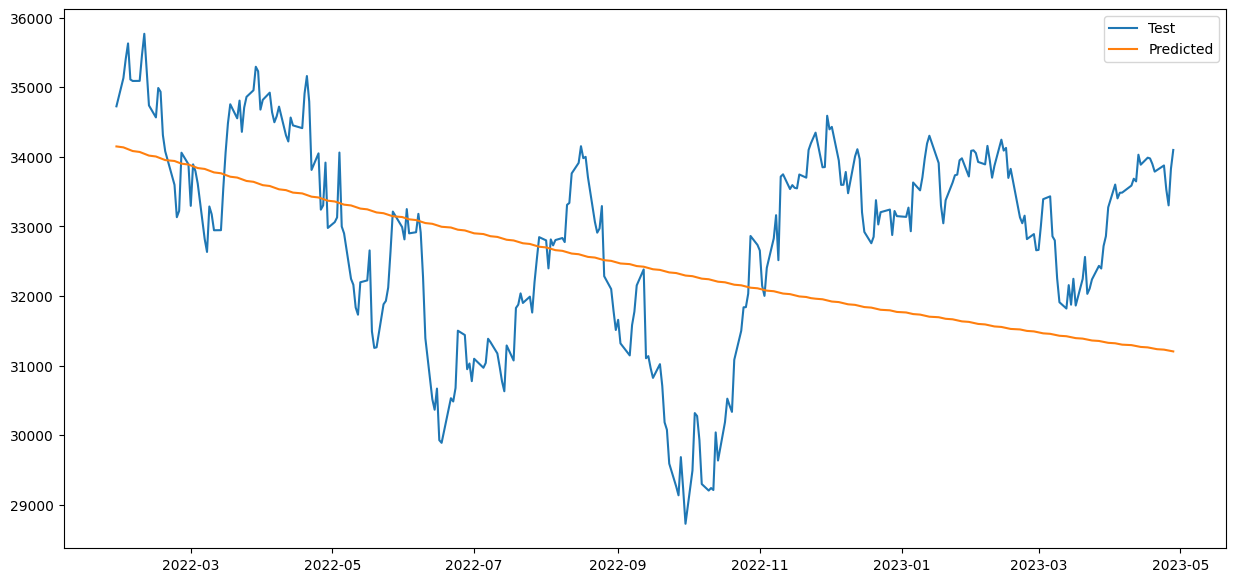

In [19]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
leg = plt.legend(loc='best')
plt.show()

In [20]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 2591580.782944549
MSE is : 1388.8585019363293
RMSE is : 1609.8387443916702
MAPE is : 4.2607761902322645
R2 is : -0.22991675606892925



#GARCH

In [21]:
!pip install statsmodels
!pip install pmdarima
!pip3 install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 10.4 MB/s eta 0:00:00


In [22]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing libraries

# Data Handling
import pandas as pd
import numpy as np

# Financial Market data
import yfinance as yf

# Statistics
import statsmodels.api as sm
import arch
from statsmodels.compat import lzip

# Data Viz
import matplotlib.pyplot as plt

from arch import arch_model
from sklearn.model_selection import train_test_split

In [23]:
df['returns'] = df['Adj Close**'].pct_change()*100
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary,returns
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669,-0.722311
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711,0.021609
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547,1.388876
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041,0.390767


In [24]:
df.dropna(inplace = True)
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary,returns
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669,-0.722311
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711,0.021609
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547,1.388876
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041,0.390767
5,1252,2018-05-08,24341.35,24412.34,24198.34,24360.21,344940000,0.009258,0.011865


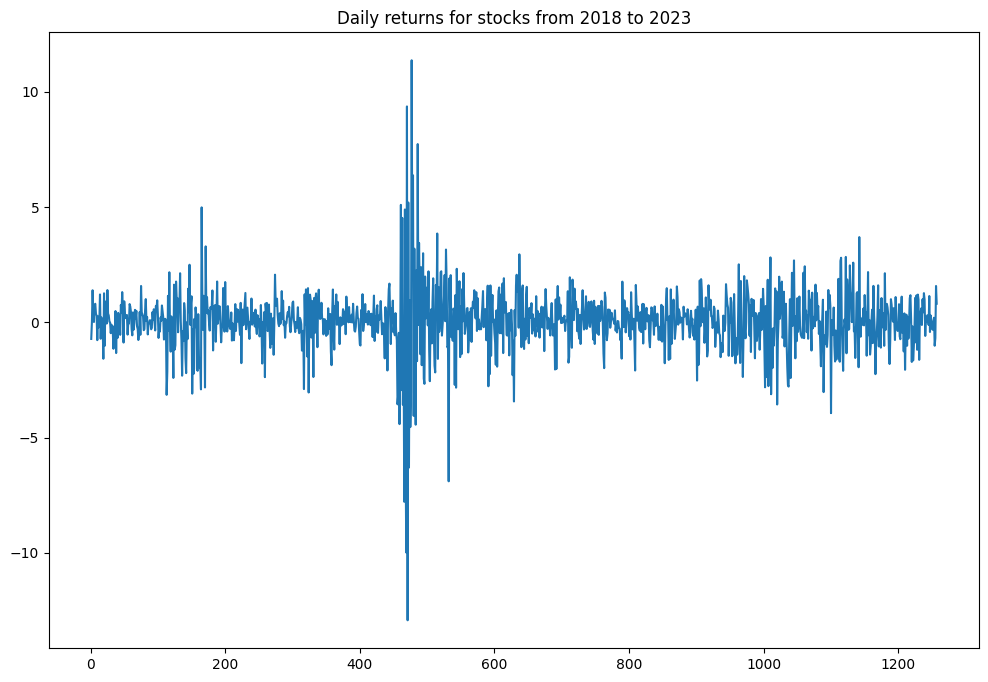

In [25]:
plt.figure(figsize=(12,8))
df['returns'].plot()
plt.title('Daily returns for stocks from 2018 to 2023')
plt.show()

In [26]:
print(f'Mean of Daily Returns = {df.returns.mean()}')

Mean of Daily Returns = 0.03677754655200348


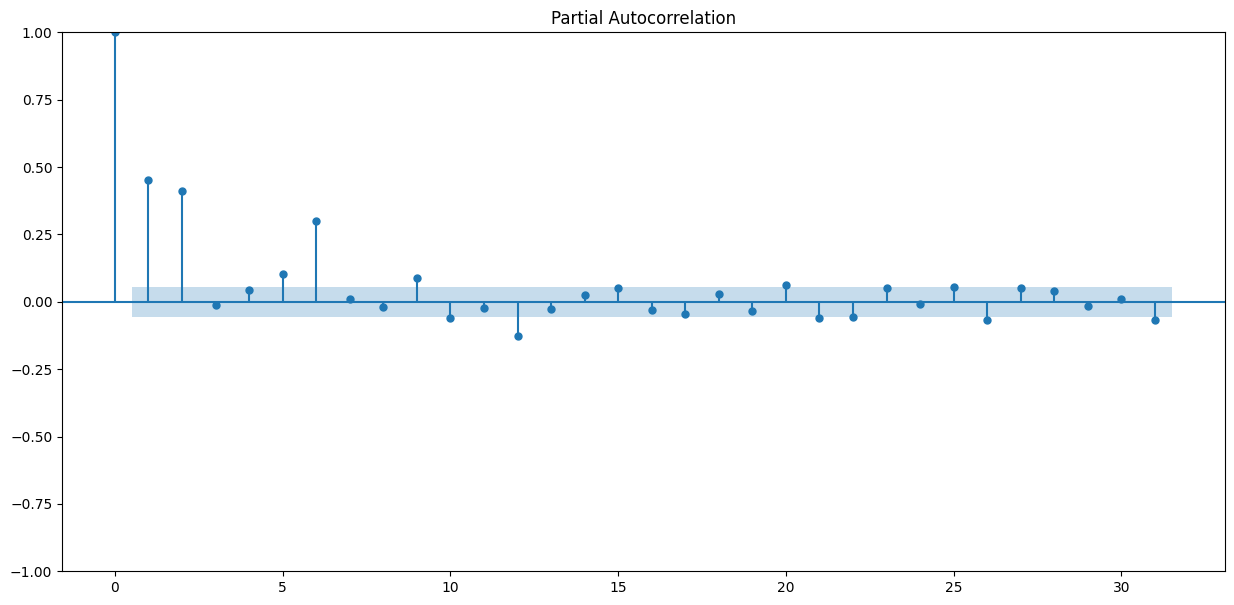

In [27]:
plot_pacf(df['returns']**2)
plt.show()

In [28]:
split_size = int(len(df)*0.3)
X = df[['returns']]
train, test = X[0:-split_size], X[-split_size:]

In [29]:
model = arch.arch_model(train, mean='Zero', vol = 'GARCH', p = 1, q = 1, rescale = False)
results = model.fit(disp='off',show_warning = False)
residuals = results.resid
squared_residuals = residuals**2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

ARCH test results:

LM Statistic: 240.28499152004528
p-value: 5.969409448298852e-46
F Statistic: 32.7774953647606
p-value: 4.426234070457763e-54


In [30]:
rolling_predictions = []
test_size = int(len(df)*0.3)

returns = df['returns']

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, mean='Zero', vol = 'GARCH', p = 1, q = 1, rescale = False)
    model_fit = model.fit(disp='off', show_warning = False)
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [31]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

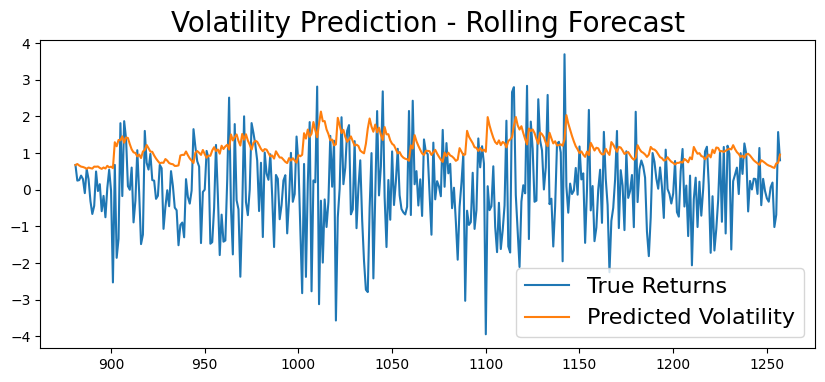

In [32]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)